# Correlaciones y Regresión Linear Simple

### OBJETIVO

- Realizar `análisis bivariado` con variables numéricas
- Identificar `valores atípicos` y decidir qué hacer con ellos
- Explorar las `relaciones` existentes entre nuestras `variables numéricas`
- Entrenar modelos de `regresión lineal` para realizar predicciones

En este notebook se presenta un análisis de correlación de variables numéricas de:


1.   Un análisis bivariado con variables numéricas
2.   Un modelo de regresión ajustado para ciertos datos.

El dataset utilizado contiene promedios diarios de contaminantes atmosféricos, $PM_{10}$ y $PM_{2.5}$ para cada zona de la Zona Metropolitana del Valle de México, además del índice de Calidad del Aire asociado a esta concentración diaria y a la clase de contaminación para cada uno de los contaminantes. 

Aunque el objetivo del proyecto no es establecer una relación entre las concentraciones de  $PM_{10}$ y $PM_{2.5}$ entre ellas, se realizará la exploración de estas relaciones a modelo de práctica,separando las mediciones que corresponden a los años 2019 y 2020.


## Correlación
### Lectura y observación de los datos
Después de importar las librerías que utilizaremos, procederemos a leer el conjunto de datos y haciendo una exploración preliminar de ellos para eliminar aquella información que no será relevante para este análisis de correlación y regresión lineal.



In [1]:
#Lectura de los paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Lectura del dataset y el tipo de datos que contiene
df= pd.read_csv('../Datasets/DatosPM_Zona.csv', index_col=0)
df.dtypes

Date            object
Year             int64
Month            int64
Zone            object
PD_PM10        float64
Max_PM10       float64
Min_PM10       float64
Indice_PM10    float64
Clase_PM10      object
PD_PM25        float64
Max_PM25       float64
Min_PM25       float64
Indice_PM25    float64
Clase_PM25      object
dtype: object

In [3]:
#El número de registros con los que cuenta el dataset
len(df)

870

In [4]:
#Vista de las primeras líneas del dataset
df.head()

,Date,Year,Month,Zone,PD_PM10,Max_PM10,Min_PM10,Indice_PM10,Clase_PM10,PD_PM25,Max_PM25,Min_PM25,Indice_PM25,Clase_PM25
0,2019-03-01,2019,3,CE,56.0,101.0,23.0,72.618,Regular,27.0,55.0,8.0,33.750,Buena
1,2019-03-01,2019,3,NE,81.0,161.0,37.0,102.775,Mala,32.2,62.0,1.0,40.250,Buena
2,2019-03-01,2019,3,NO,63.0,112.0,21.0,82.706,Regular,35.1,61.0,12.0,43.875,Buena
3,2019-03-01,2019,3,SE,56.0,111.0,8.0,72.618,Regular,24.4,47.0,6.0,30.500,Buena
4,2019-03-01,2019,3,SO,38.0,85.0,3.0,47.500,Buena,20.3,44.0,1.0,25.375,Buena


Se identifican las variables categóricas de Date, Zone, Clase_PM10 y Clase PM25. Además, se encuentran las variables categóricas correspondientes al año y al mes que en este momento se encuentran como variables numéricas. 

Entonces, se cambia el tipo de dato en la columna de Month y Year.

In [5]:
df=df.astype({'Month':'category', 'Year':'category'})
#Eliminar los NA
df = df.dropna()
len(df)

870

In [6]:
df.head()

,Date,Year,Month,Zone,PD_PM10,Max_PM10,Min_PM10,Indice_PM10,Clase_PM10,PD_PM25,Max_PM25,Min_PM25,Indice_PM25,Clase_PM25
0,2019-03-01,2019,3,CE,56.0,101.0,23.0,72.618,Regular,27.0,55.0,8.0,33.750,Buena
1,2019-03-01,2019,3,NE,81.0,161.0,37.0,102.775,Mala,32.2,62.0,1.0,40.250,Buena
2,2019-03-01,2019,3,NO,63.0,112.0,21.0,82.706,Regular,35.1,61.0,12.0,43.875,Buena
3,2019-03-01,2019,3,SE,56.0,111.0,8.0,72.618,Regular,24.4,47.0,6.0,30.500,Buena
4,2019-03-01,2019,3,SO,38.0,85.0,3.0,47.500,Buena,20.3,44.0,1.0,25.375,Buena


In [7]:
df.dtypes

Date             object
Year           category
Month          category
Zone             object
PD_PM10         float64
Max_PM10        float64
Min_PM10        float64
Indice_PM10     float64
Clase_PM10       object
PD_PM25         float64
Max_PM25        float64
Min_PM25        float64
Indice_PM25     float64
Clase_PM25       object
dtype: object

### Primera visualización de correlaciones con heatmap
Teniendo el conjunto de datos con los valores numéricos y sin NA. Se procede a hacer la primera visualización de las relaciones que pueden existir entre las variables mediante una matriz de correlación y un pairplot.

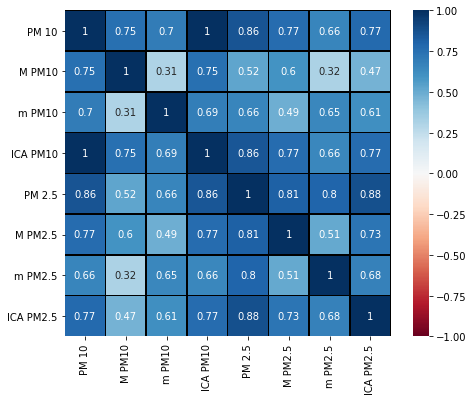

In [8]:
fig= plt.figure(figsize= (8,6))

labels=["PM 10", "M PM10", "m PM10", "ICA PM10","PM 2.5", "M PM2.5", "m PM2.5", "ICA PM2.5" ]

ax= sns.heatmap(df.corr(), vmin=-1, vmax=1, annot= True, cmap= "RdBu", linewidths=0.5, linecolor="Black", square=True, robust=True,
                xticklabels= labels, yticklabels= labels)

Sin distinguir los datos entre años, nos encontramos que este dataset tiene 100% relaciones positivas. Las relaciones positivas esperadas son las relativas a los índices de calidad del aire (ICA) y la concentración diaria promedio de los contaminantes, pues este último valor sirve para el cálculo de ICA.

Hablando sobre el mismo contaminante, los valores mínimos y máximos tienen también una correlación positiva muy grande con el promedio diario. 

La correlación más interesante, se da entre la concentración diaria de $PM_{10}$ y la concentración diaria de $PM_{2.5}$, pues sus fuentes de emisión no están siempre relacionadas. Además, los equipos de medición de $PM_{10}$ son más accesibles que las mediciones de $PM_{2.5}$, anudado a que estas últimas causan una mayor afectación al sistema respiratorio humano.

### Segunda observación de correlaciones con pairplot
Ahora realizaremos el pairplot general para observar la relación entre estas variables





<Figure size 576x432 with 0 Axes>

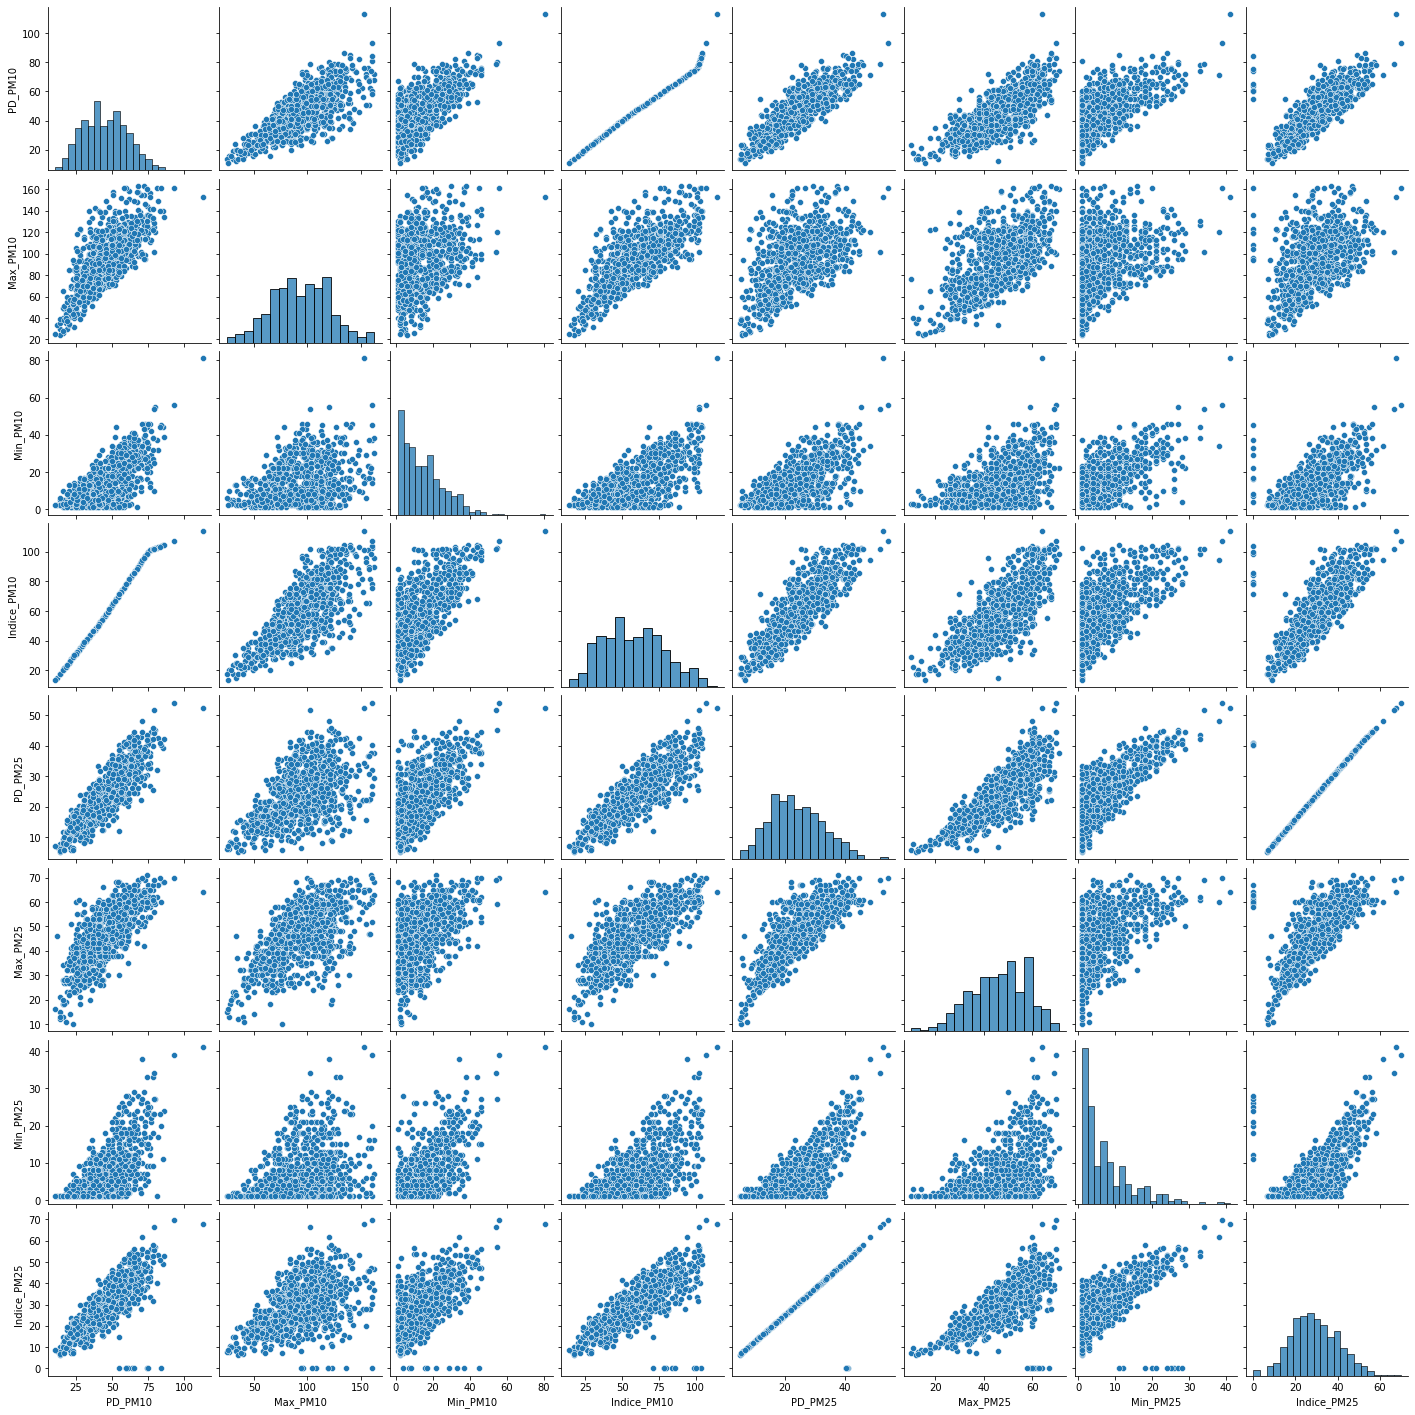

In [9]:
plt.figure(figsize= (8,6))
ax= sns.pairplot(df);

Se observa las relaciones positivas entre las variables y la clara correlación lineal correspondiente al cálculo del ICA utilizando los promedios diarios de los contaminantes. 

A simple vista, no parece haber valores atípicos entre las variables, sin embargo, se prodecerá a realizar las gráficas de dispersión en aquellas variables que sería interesante correlacionar, como lo son el promedio diario de $PM_{10}$ y $PM_{2.5}$, 

### Gráficos de dispersión y valores atípicos
Como siguiente paso, observaremos si hay algún valor atípico de las variables numéricas que son de nuestro interés, haciendo una separación entre el año 2019 y 2020.

Primero tomamos las columnas que son de nuestro interés para este análisis y observamos los principales datos de locación.

In [10]:
df.groupby(by='Year')[['PD_PM10', 'PD_PM25']].describe().T

Year                 2019        2020
PD_PM10 count  433.000000  437.000000
        mean    49.914550   40.805492
        std     15.674336   13.370211
        min     14.000000   11.000000
        25%     39.000000   30.000000
        50%     50.000000   40.000000
        75%     60.000000   51.000000
        max    113.000000   79.000000
PD_PM25 count  433.000000  437.000000
        mean    26.186605   21.604348
        std      8.789072    8.129116
        min      7.800000    5.200000
        25%     19.500000   15.900000
        50%     25.500000   20.900000
        75%     32.200000   26.800000
        max     54.100000   51.700000

#### Gráficas de dispersión
Luego, para observar primeramente la correlación entre las variables, se procede a realizar gráficos de dispersión para cada contaminante de acuerdo al año.

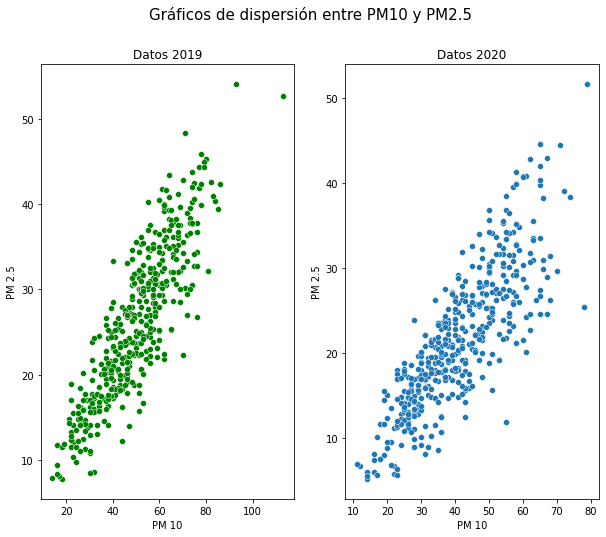

In [11]:
datos19=df[df['Year']==2019]
datos20=df[df['Year']==2020]
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 8), sharex=False, sharey=False)

sns.scatterplot(x= datos19['PD_PM10'], y=datos19['PD_PM25'], ax=ax1, color= 'green')
sns.scatterplot(x= datos20['PD_PM10'], y=datos20['PD_PM25'], ax = ax2)

ax1.set(xlabel='PM 10', ylabel='PM 2.5', title='Datos 2019')
ax2.set(xlabel='PM 10', ylabel='PM 2.5', title='Datos 2020')


fig.suptitle('Gráficos de dispersión entre PM10 y PM2.5', fontsize=15);


También obtenemos el valor de correlación para cada uno de los años

In [12]:
print(f'El valor de correlación entre el PM10 y PM2.5 en 2019 fue de {round(datos19["PD_PM10"].corr(datos19["PD_PM25"]),2)}')
print(f'El valor de correlación entre el PM10 y PM2.5 en 2020 fue de {round(datos20["PD_PM10"].corr(datos20["PD_PM25"]),2)}')


El valor de correlación entre el PM10 y PM2.5 en 2019 fue de 0.87
El valor de correlación entre el PM10 y PM2.5 en 2020 fue de 0.83


Tenemos una correlación bastante alta para los dos años y los valores atípicos, parecen ser muy poco.  
Sin embargo, heremos el ejercicio de ver si realmente hay valores atípicos a manera de práctica.

Primeramente, realizamos un gráfico de cajas para visualizar los valores atípicos para cada uno de los años y para cada contaminante.

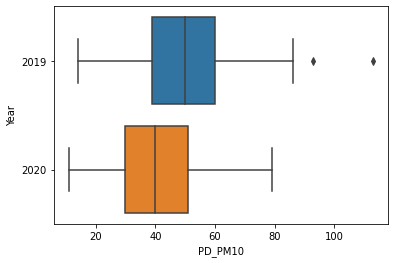

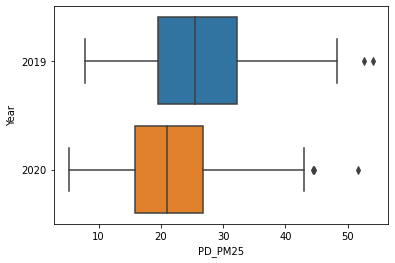

In [13]:
column=['PD_PM10',  'PD_PM25']

for i in column:
    plt.figure()
    sns.boxplot(x=i, y= 'Year',data=df);

Observamos un par de valores atípicos en los datos de $PM_{10}$ en 2019, y valores atípicos en ambos años de $PM_{2.5}$. En todos los casos se tratan de valores atípicos superiores.

In [14]:
#Función para eliminar atípicos superiores
def atipicos(columna):
  rango=columna.quantile(0.75)-columna.quantile(0.25)
  filtro= columna<(columna.quantile(0.75)+ rango*1.5)
  return filtro

In [15]:
#Eliminamos los atípicos
#PM25
filtro= atipicos(datos19['PD_PM10'])
datos19= datos19[filtro]
filtro= atipicos(datos19['PD_PM25'])
datos19= datos19[filtro]
filtro= atipicos(datos20['PD_PM25'])
datos20= datos20[filtro]

Con los datos filtrados, observamos los datos de locación y las nuevamente evaluamos la gráfica de dispersión y los datos de correlación.

In [16]:
#Datos de 2019 sin atípicos
datos19[['PD_PM10','PD_PM25']].describe().T

,count,mean,std,min,25%,50%,75%,max
PD_PM10,431.0,49.668213,15.270701,14.0,39.0,50.0,60.00,86.0
PD_PM25,431.0,26.060557,8.611427,7.8,19.5,25.4,32.15,48.3


In [17]:
#Datos de 2020 sin atípicos
datos20[['PD_PM10','PD_PM25']].describe().T

,count,mean,std,min,25%,50%,75%,max
PD_PM10,434.0,40.592166,13.157846,11.0,30.000,40.0,50.0,78.0
PD_PM25,434.0,21.429263,7.873116,5.2,15.825,20.9,26.7,43.0


In [18]:
#Datos originales
df.groupby(by='Year')[['PD_PM10', 'PD_PM25']].describe().T

Year                 2019        2020
PD_PM10 count  433.000000  437.000000
        mean    49.914550   40.805492
        std     15.674336   13.370211
        min     14.000000   11.000000
        25%     39.000000   30.000000
        50%     50.000000   40.000000
        75%     60.000000   51.000000
        max    113.000000   79.000000
PD_PM25 count  433.000000  437.000000
        mean    26.186605   21.604348
        std      8.789072    8.129116
        min      7.800000    5.200000
        25%     19.500000   15.900000
        50%     25.500000   20.900000
        75%     32.200000   26.800000
        max     54.100000   51.700000

A simple vista, se observa que los datos atípicos eliminados causaron un cambio muy pequeño en las variables de locación. Sin embargo, se realizan nuevamente los gráficos de dispersión y se calcula la correlación para corroborar.

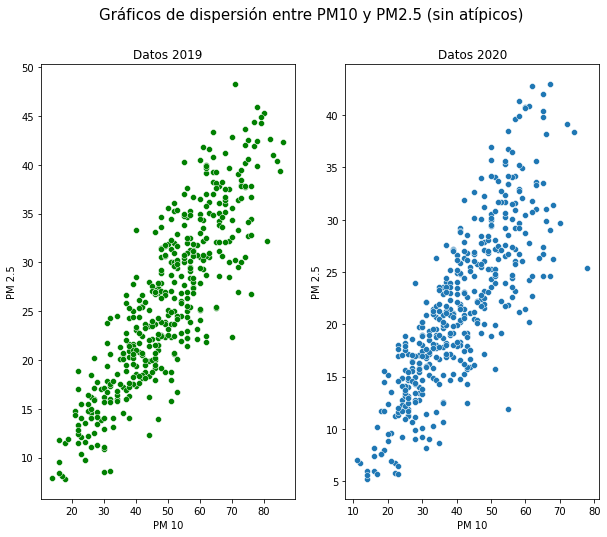

In [19]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 8), sharex=False, sharey=False)

sns.scatterplot(x= datos19['PD_PM10'], y=datos19['PD_PM25'], ax=ax1, color= 'green')
sns.scatterplot(x= datos20['PD_PM10'], y=datos20['PD_PM25'], ax = ax2)

ax1.set(xlabel='PM 10', ylabel='PM 2.5', title='Datos 2019')
ax2.set(xlabel='PM 10', ylabel='PM 2.5', title='Datos 2020')


fig.suptitle('Gráficos de dispersión entre PM10 y PM2.5 (sin atípicos)', fontsize=15);

In [20]:
print(f'El valor de correlación entre el PM10 y PM2.5 en 2019 fue de {round(datos19["PD_PM10"].corr(datos19["PD_PM25"]),2)}')
print(f'El valor de correlación entre el PM10 y PM2.5 en 2020 fue de {round(datos20["PD_PM10"].corr(datos20["PD_PM25"]),2)}')


El valor de correlación entre el PM10 y PM2.5 en 2019 fue de 0.86
El valor de correlación entre el PM10 y PM2.5 en 2020 fue de 0.82


Observamos que incluso el valor de correlación fue un decimal más bajo al hacer la eliminación de atípicos.

## Regresión Lineal

Posteriormente, procedemos a realizar una regresión linear con: 

1.   Parámetros de $PM_{10}$ frente a $PM_{2.5}$ de todos los datos.
2.   Parámetros de $PM_{10}$ frente a $PM_{2.5}$ de todos los datos utilizando el año como una variable categórica para la regresión.

Cabe señalar que la predicción de las concentraciones de un contaminante con respecto a otro no es el objetivo de nuestro estudio, por lo que esto se hace a manera de práctica. Sin embargo, vale la pena resaltar que establecer una relación entre las concentraciones de $PM_{10}$ y $PM_{2.5}$ puede ser interesante.

Primeramente se lee la librería requerida y se determina la variable del modelo de regresión lineal.

In [21]:
#Leer el paquete
from sklearn.linear_model import LinearRegression
from scipy import stats

In [22]:
#Establecer la regresión linear
lr = LinearRegression()

### Primera prueba de regresión
Primeramente haremos una aproximación de una recta de regresión utilizando datos de la concentración promedio diaria de $PM_{10}$ para estimar la concentración promedio diaria de $PM_{2.5}$

In [23]:
#Establecer los parámetros
lr.fit(df['PD_PM10'].to_frame(), df['PD_PM25'])
y_predict_PM25 = lr.predict(df['PD_PM10'].to_frame())


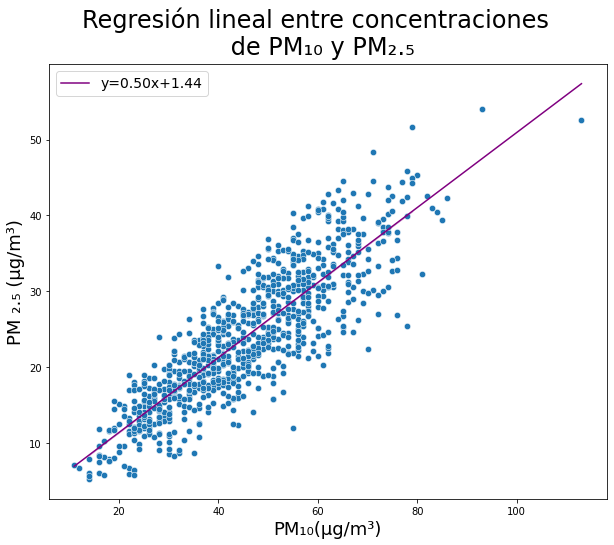

In [24]:
fig= plt.figure(figsize=(10, 8))

sns.scatterplot(x=df['PD_PM10'], y=df['PD_PM25'], s=40);
sns.lineplot(x=df['PD_PM10'], y=y_predict_PM25, color= "purple", label= 'y={:.2f}x+{:.2f}'.format(lr.coef_[0],lr.intercept_));
plt.xlabel('PM₁₀(µg/m³)', fontsize= 18)
plt.ylabel('PM ₂․₅ (µg/m³)', fontsize= 18)
plt.legend(fontsize= 14)
fig.suptitle('Regresión lineal entre concentraciones \n de PM₁₀ y PM₂․₅', fontsize=24);


In [25]:
print(f'El coeficiente de determinación R² es: {round(lr.score(df["PD_PM10"].to_frame(), df["PD_PM25"]),4)}')

El coeficiente de determinación R² es: 0.7421


Con esto podemos observar que un modelo de regresión lineal para estimar la concentración promeido  diaria de $PM_{2.5}$ a partir de la concentración diaria de $PM_{10}$ podría ser capaz de acercarse al resultado real 74% de las veces.

### Regresión lineal segunda prueba
Ahora realizaremos la prueba utilizando el año como variable categórica y observar si hay un cambio entre los coeficientes de la regresión lineal o si se mejora de alguna manera la predicción.

In [26]:
X= df[['PD_PM10','Year']]
X= pd.get_dummies(data=X, drop_first=True)
X.head()

,PD_PM10,Year_2020
0,56.0,0
1,81.0,0
2,63.0,0
3,56.0,0
4,38.0,0


In [27]:
Y = df['PD_PM25']

In [28]:
lr.fit(X, Y)
y_predict_2 = lr.predict(X)

In [29]:
coeff_parameter = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
PD_PM10,0.494270
Year_2020,-0.079924


Observamos que aparentement el año no es una variable muy relevante en comparación con la concentración diaria de $PM_{10}$. Sin embargo, procederemos a evaluar el coeficiente de determinación R²

In [30]:
print(f'El coeficiente de determinación R² es: {round(lr.score(X,Y),4)}')

El coeficiente de determinación R² es: 0.7421


Al no cambiar el valor del coeficiente de correlación, nos indica que esta nueva variable aporta muy poco al modelo de regresión.